In [1]:
#KNN for unsupervised learning 
# Auther Nawab khan

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rs = 123

In [9]:
dataset_url = (r"C:\Users\PMLS\Downloads/tumor.csv")
tumor_df = pd.read_csv(dataset_url)

In [11]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [13]:
tumor_df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [15]:
X = tumor_df.iloc[:, :-1]
y = tumor_df.iloc[:, -1:]

In [17]:
X.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: ylabel='Count'>

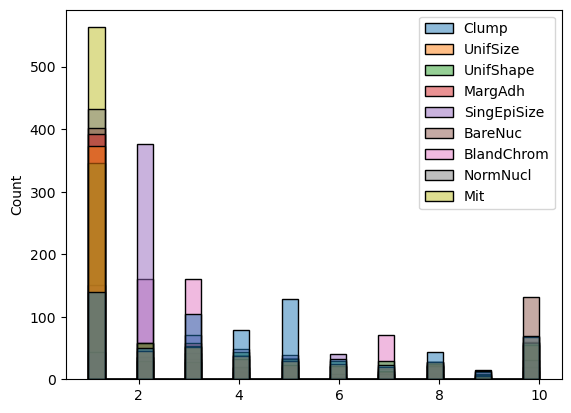

In [19]:
sns.histplot(X)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_104140\129081890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X)


<Axes: ylabel='Density'>

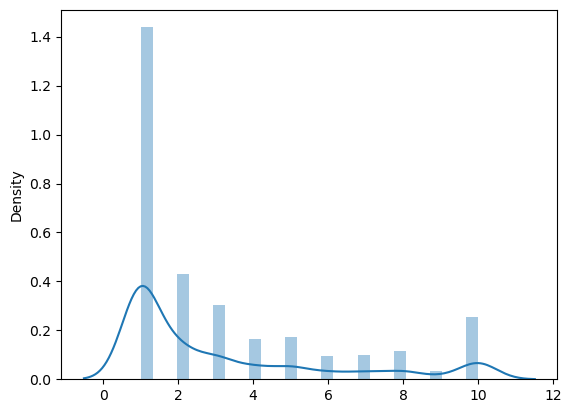

In [21]:
sns.distplot(X)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_104140\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: ylabel='Density'>

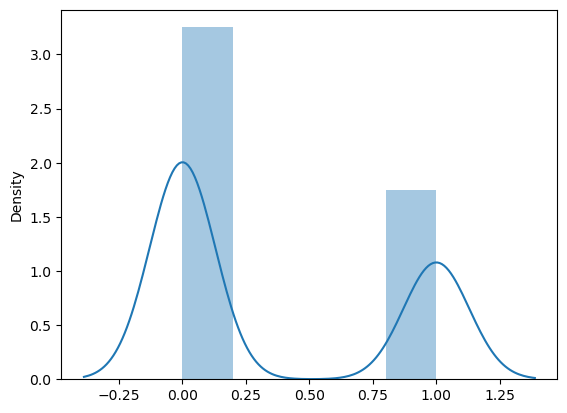

In [27]:
sns.distplot(y)

In [29]:
y.value_counts(normalize=True)

Class
0        0.650073
1        0.349927
Name: proportion, dtype: float64

In [31]:
y.value_counts()

Class
0        444
1        239
Name: count, dtype: int64

<Axes: xlabel='Class'>

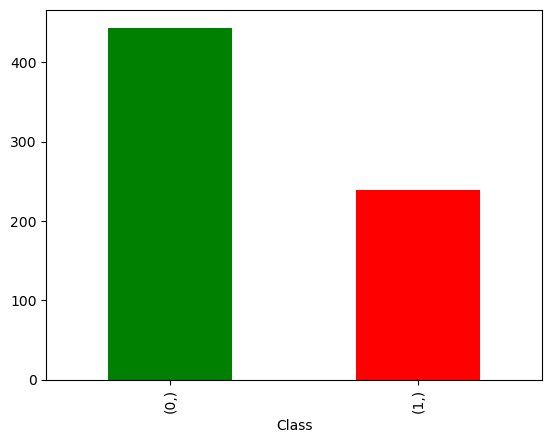

In [33]:
y.value_counts().plot.bar(color=['green', 'red'])

<Axes: >

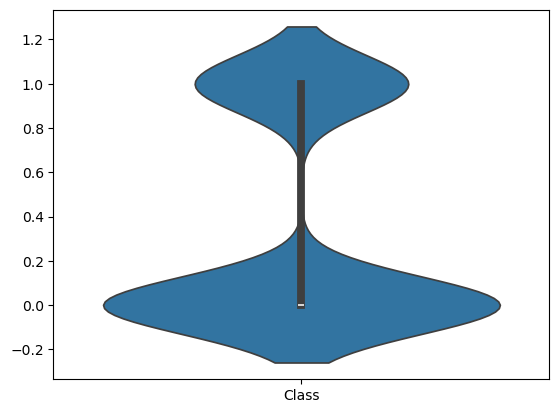

In [37]:
sns.violinplot(y)

In [41]:
tumor_df.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [45]:
tumor_df.duplicated().sum()

234

<Axes: >

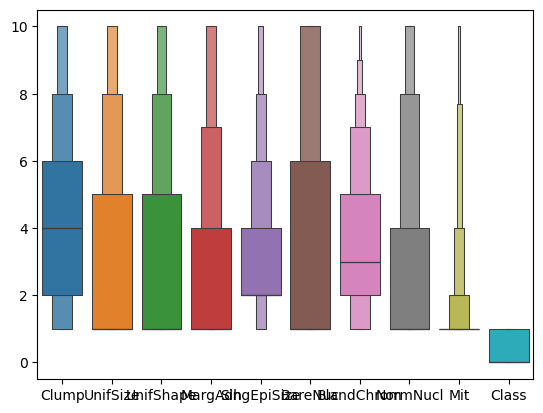

In [49]:
sns.boxenplot(tumor_df)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [55]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [57]:
preds = knn_model.predict(X_test)

In [59]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [61]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9416058394160584,
 'recall': 0.875,
 'precision': 0.9545454545454546,
 'f1score': 0.9130434782608695}

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=8)

In [77]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=8)

In [79]:
preds = knn_model.predict(X_test)

In [81]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [83]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9635036496350365,
 'recall': 0.9375,
 'precision': 0.9574468085106383,
 'f1score': 0.9473684210526315}

In [85]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [87]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9485
2,0.9130
3,0.9485
4,0.9583
5,0.9691
6,0.9583
7,0.9583
8,0.9474
9,0.9474


Text(0.5, 1.0, 'KNN F1 Score')

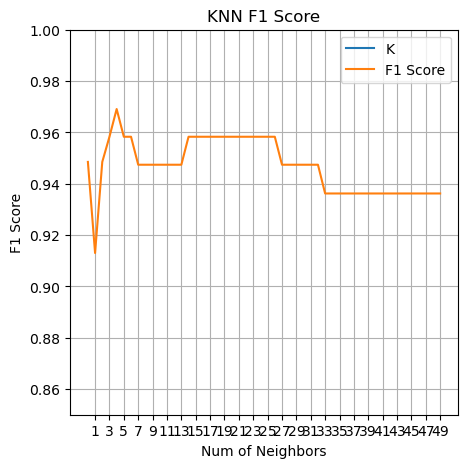

In [93]:
# Plot F1 results
ax = f1_results.plot(figsize=(5, 5))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.grid()
plt.title('KNN F1 Score')